In [47]:
from pprint import pprint

import numpy as np
import networkit as nk
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from graph_reinforcement_learning_using_blockchain_data import config
from graph_reinforcement_learning_using_blockchain_data import graphs
import scipy.sparse as sp

config.load_dotenv()

True

In [23]:
df_features_edges = pd.read_csv(
    config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features_edges.csv"
)
print(df_features_edges.head())

                                     transactionHash  blockNumber  gasUsed  \
0  0x8e90ecb85b61af368db0154830453552f0c27e0e1812...     17005294   153529   
1  0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...     16962424   123497   
2  0x8b434ba680a93cc0e85a7c431e5b35a8efb60ef05c24...     16993741    21000   
3  0x8d3b8e46a66a909643f2bb7497b18c954fc22fa5bd5c...     16972733    46817   
4  0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...     17028487    32215   

   cumulativeGasUsed  transactionIndex  effectiveGasPrice  status  \
0           10750253               111        19150328915       1   
1             229900                 1       139502435999       1   
2           15838026               183        22098066562       1   
3           14885776               165        18825121161       1   
4            3160909                48        19660583885       1   

                 fee                                        from  \
0   2940130847991035  0x832aC338d06f5A438f3340B7

In [24]:
G = nx.from_pandas_edgelist(df_features_edges, source="from", target="to", create_using=nx.Graph())

In [25]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [26]:
nkg = nk.nxadapter.nx2nk(G)
nk.graphtools.density(nkg)

1.5638805425865442e-05

In [27]:
g_g0 = graphs.Graph(G0)
metrics_g0 = g_g0.compute_graph_metrics()
pprint(metrics_g0)

{'average_degree': 4.213332561438041,
 'clustering_coefficient': 0.0013616383210860788,
 'degree_distribution': {2: 62329,
                         4: 4348,
                         6: 866,
                         8: 350,
                         10: 175,
                         12: 127,
                         14: 103,
                         16: 64,
                         18: 61,
                         20: 49,
                         22: 38,
                         24: 37,
                         26: 25,
                         28: 34,
                         30: 22,
                         32: 26,
                         34: 26,
                         36: 20,
                         38: 15,
                         40: 15,
                         42: 17,
                         44: 16,
                         46: 7,
                         48: 7,
                         50: 7,
                         52: 11,
                         54: 10,
                  

In [28]:
g_all_nodes = graphs.Graph(G)
metrics_all_nodes = g_all_nodes.compute_graph_metrics()
pprint(metrics_all_nodes)

{'average_degree': 3.517365504214409,
 'clustering_coefficient': 0.0008382579089858824,
 'degree_distribution': {2: 102396,
                         4: 6117,
                         6: 1394,
                         8: 636,
                         10: 311,
                         12: 213,
                         14: 153,
                         16: 105,
                         18: 85,
                         20: 73,
                         22: 55,
                         24: 46,
                         26: 43,
                         28: 41,
                         30: 28,
                         32: 33,
                         34: 32,
                         36: 22,
                         38: 22,
                         40: 15,
                         42: 21,
                         44: 17,
                         46: 10,
                         48: 9,
                         50: 9,
                         52: 12,
                         54: 10,
              

In [29]:
df_features_nodes = pd.read_csv(
    config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features_nodes_improved.csv"
)

In [30]:
df_features_nodes.head()

,account,gasUsed_mean,cumulativeGasUsed_mean,transactionIndex_min,transactionIndex_max,transactionIndex_mean,effectiveGasPrice_mean,effectiveGasPrice_max,status_mean,fee_mean,...,dummy_0xd78ad95f_mean,dummy_0x908fb5ee_mean,dummy_0x9d9af8e3_mean,dummy_0x8201aa3f_mean,dummy_0x8c5be1e5_mean,dummy_0x1c411e9a_mean,dummy_0xc42079f9_mean,dummy_0x17307eab_mean,dummy_0xe9149e1b_mean,dummy_0x19b47279_mean
0,0x00000000000124d994209fbB955E0217B5C2ECA1,101787.000000,3.744024e+06,3,48,21.272727,3.897291e+10,62912040686,0.818182,4.181177e+15,...,0.272727,0.0,0.0,0.0,0.272727,0.272727,0.454545,0.0,0.0,0.000000
1,0x000000000002e6fD89aC3B5798a5d32312B8a49f,21000.000000,9.850199e+06,123,123,123.000000,2.124601e+10,21246009046,1.000000,4.461662e+14,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0x0000000000055772357E58581A2A2C5C6D9E8F64,184513.083333,2.028324e+06,0,94,12.666667,4.816098e+10,809819701570,1.000000,9.001021e+15,...,0.510417,0.0,0.0,0.0,0.000000,0.510417,0.968750,0.0,0.0,0.520833
3,0x00000000000FFE26043F4C963A16612f8410A881,132305.000000,1.212181e+07,147,147,147.000000,2.896867e+10,28968672309,1.000000,3.832700e+15,...,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0x0000000000E3C7175357AAE6FCE025bE01Aa13Ca,21000.000000,1.721499e+07,71,71,71.000000,1.552685e+11,155268454128,1.000000,3.260638e+15,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [31]:
print(df_features_nodes.dtypes)

account                    object
gasUsed_mean              float64
cumulativeGasUsed_mean    float64
transactionIndex_min        int64
transactionIndex_max        int64
transactionIndex_mean     float64
effectiveGasPrice_mean    float64
effectiveGasPrice_max       int64
status_mean               float64
fee_mean                  float64
account_label               int64
num_logs_min                int64
num_logs_max                int64
num_logs_mean             float64
dummy_0xddf252ad_mean     float64
dummy_0xddac4093_mean     float64
dummy_0x7fcf532c_mean     float64
dummy_0xe1fffcc4_mean     float64
dummy_0xd78ad95f_mean     float64
dummy_0x908fb5ee_mean     float64
dummy_0x9d9af8e3_mean     float64
dummy_0x8201aa3f_mean     float64
dummy_0x8c5be1e5_mean     float64
dummy_0x1c411e9a_mean     float64
dummy_0xc42079f9_mean     float64
dummy_0x17307eab_mean     float64
dummy_0xe9149e1b_mean     float64
dummy_0x19b47279_mean     float64
dtype: object


In [36]:
df_features_nodes["num_logs_mean"].median()

1.0

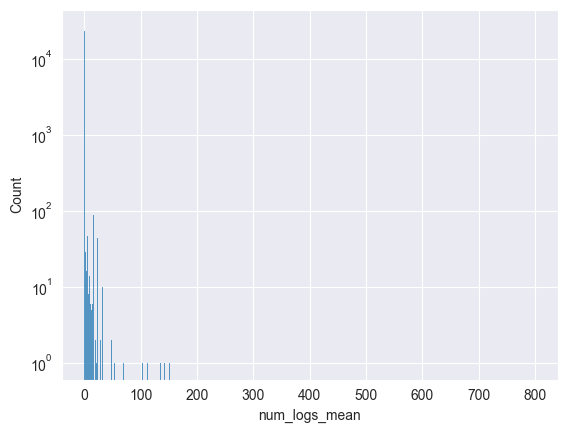

In [34]:
sns.histplot(data=df_features_nodes, x="num_logs_mean")
plt.yscale("log")
plt.show()

In [40]:
len(df_features_nodes)

78656

In [41]:
df_features_nodes = df_features_nodes[df_features_nodes["num_logs_mean"] > 1]

In [42]:
len(df_features_nodes)

27580

In [43]:
df_features_nodes_numeric = df_features_nodes.drop(columns=["account"])
features_nodes_numeric_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_features_nodes_numeric)
)

In [44]:
features_nodes_numeric_transposed = features_nodes_numeric_scaled.transpose()
features_nodes_numeric_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,27570,27571,27572,27573,27574,27575,27576,27577,27578,27579
0,-0.203653,-0.044168,-0.144818,-0.205016,0.067529,-0.175763,-0.114368,-0.186099,-0.291638,-0.125902,...,1.374174,-0.247763,-0.175517,0.027551,-0.099461,0.204510,-0.098169,0.103127,-0.199698,-0.100277
1,-0.926155,-1.211155,0.465501,2.057550,-1.465066,-1.236792,2.055512,-0.910617,-0.536123,-0.854440,...,2.713422,-0.901592,0.744055,-1.318625,0.812880,0.032114,-0.477684,-0.359058,-0.882882,-0.611988
2,-1.310632,-1.356067,0.870244,2.157566,-1.325777,-1.189472,-0.371644,-1.113747,-1.280342,-0.765413,...,1.824377,-1.356067,0.703649,-1.340922,1.718362,-0.114179,-0.083889,0.234155,-1.159182,-0.810848
3,-0.781575,-0.116658,0.649443,1.878095,-1.446493,-1.085125,1.025266,-1.244127,0.461531,-0.911668,...,1.560091,0.345894,0.490441,-1.229672,1.458908,0.591624,-0.261205,0.042344,-0.665937,-0.955032
4,-1.140523,-1.274362,0.814756,2.136655,-1.440248,-1.175868,0.379307,-1.222523,-0.667844,-0.864833,...,1.794517,-0.765302,0.643687,-1.366377,1.685654,0.278221,-0.165004,0.161583,-0.993135,-0.911488


In [45]:
corr_matrix = features_nodes_numeric_transposed.corr()

In [46]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,27570,27571,27572,27573,27574,27575,27576,27577,27578,27579
0,1.000000,0.222149,-0.333586,-0.537614,0.360806,0.253136,-0.308878,0.181840,0.107288,0.380732,...,-0.376544,0.783975,-0.269199,0.359337,-0.270857,-0.071408,-0.114715,-0.043459,0.276620,0.036333
1,0.222149,1.000000,-0.175411,-0.206803,0.301511,0.132283,-0.077352,0.158406,0.169402,0.233244,...,-0.286721,0.111937,-0.067997,0.339945,-0.267714,-0.085533,-0.044172,-0.119904,0.235661,0.040434
2,-0.333586,-0.175411,1.000000,0.567003,-0.296584,-0.467086,0.275150,-0.566096,-0.454760,-0.254240,...,0.773877,-0.217605,0.217342,-0.497460,-0.060617,0.760078,-0.474983,0.361008,-0.580443,-0.590430
3,-0.537614,-0.206803,0.567003,1.000000,-0.632301,-0.850107,0.671121,-0.650804,-0.357399,-0.340449,...,0.737982,-0.174662,0.564356,-0.538768,0.375172,0.194682,-0.309522,-0.035262,-0.654205,-0.562163
4,0.360806,0.301511,-0.296584,-0.632301,1.000000,0.530422,-0.506970,0.389600,0.124361,0.366683,...,-0.472594,0.110105,-0.452939,0.771804,-0.294962,-0.136918,0.269798,-0.107217,0.447142,0.409201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27575,-0.071408,-0.085533,0.760078,0.194682,-0.136918,-0.323700,0.315998,-0.502404,0.073750,-0.241674,...,0.597520,-0.135273,0.402257,-0.372531,-0.286816,1.000000,-0.530232,0.351076,-0.499958,-0.545167
27576,-0.114715,-0.044172,-0.474983,-0.309522,0.269798,0.627736,-0.421061,0.595733,0.243699,-0.233009,...,-0.447140,0.094065,-0.404569,0.113021,0.447881,-0.530232,1.000000,-0.374243,0.484203,0.942143
27577,-0.043459,-0.119904,0.361008,-0.035262,-0.107217,-0.099940,-0.099669,-0.203833,-0.227597,-0.019430,...,0.160189,-0.071628,-0.074561,-0.249578,-0.391578,0.351076,-0.374243,1.000000,-0.223748,-0.329058
27578,0.276620,0.235661,-0.580443,-0.654205,0.447142,0.752665,-0.504746,0.932587,0.239531,0.390712,...,-0.692213,0.119753,-0.634602,0.502884,-0.214291,-0.499958,0.484203,-0.223748,1.000000,0.633459


In [21]:
threshold = 0.3
adj_matrix = corr_matrix.where(corr_matrix.abs() > threshold, other=0.0)

In [63]:
accounts = df_features_nodes["account"].unique().tolist()

In [23]:
G_corr = nx.Graph()
for addr in accounts:
    G_corr.add_node(addr)

for i in range(len(accounts)):
    for j in range(i + 1, len(accounts)):
        weight = adj_matrix.iat[i, j]
        if weight != 0.0:
            addr_i = accounts[i]
            addr_j = accounts[j]
            G_corr.add_edge(addr_i, addr_j, weight=weight)

In [7]:
graph_path = str(config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "correlations.gml")

In [24]:
nx.write_gml(G_corr, graph_path)

In [11]:
g = nk.readGraph(graph_path)

In [12]:
density = nk.graphtools.density(g)

In [13]:
density

0.4138826845924665

In [38]:
avg_degree = 2 * g.numberOfEdges() / g.numberOfNodes()
avg_degree

11414.470558375635

## Sparser Graph

In [ ]:
def knn_sparsify(corr, k=10):
    n = corr.shape[0]
    rows, cols, data = [], [], []

    for i in range(n):
        # Get indices sorted in descending order of correlation for row i
        idx = np.argsort(-corr[i, :])
        # Exclude self connection (assuming highest correlation is self)
        if idx[0] == i:
            knn_idx = idx[1 : k + 1]
        else:
            knn_idx = idx[:k]
        # Add the selected k neighbors and their weights
        for j in knn_idx:
            rows.append(i)
            cols.append(j)
            data.append(corr[i, j])

    # Create a CSR sparse matrix from the edge lists
    knn_graph = sp.csr_matrix((data, (rows, cols)), shape=(n, n))
    return knn_graph

In [56]:
corr_array = corr_matrix.values
sparse_graph = knn_sparsify(corr_array, k=50)

In [61]:
def create_weighted_graph_from_sparse_matrix(sparse_graph):
    G = nx.Graph()
    # Add nodes with account names
    for addr in accounts:
        G.add_node(addr)

    # Convert the sparse matrix to COO format and add edges
    coo = sparse_graph.tocoo()
    for i, j, w in zip(coo.row, coo.col, coo.data):
        # To avoid duplicates in an undirected graph, only add edge once
        if i < j:
            G.add_edge(accounts[i], accounts[j], weight=w)
    return G

In [64]:
G_sparse = create_weighted_graph_from_sparse_matrix(sparse_graph)

In [65]:
g_sparse = graphs.Graph(G_sparse)
g_sparse.compute_graph_metrics()

{'size': 27580,
 'density': 0.0018108858930693686,
 'average_degree': 99.88484408992024,
 'clustering_coefficient': 0.4916184684783728,
 'largest_component_size': 27579,
 'num_isolated_nodes': 1,
 'degree_distribution': {100: 2046,
  98: 1519,
  102: 1618,
  96: 1157,
  104: 1311,
  108: 960,
  94: 956,
  92: 828,
  106: 1108,
  110: 904,
  90: 700,
  114: 698,
  88: 633,
  112: 746,
  82: 514,
  116: 591,
  84: 545,
  86: 620,
  80: 415,
  118: 556,
  120: 548,
  76: 357,
  126: 377,
  124: 411,
  74: 337,
  130: 264,
  78: 382,
  122: 448,
  72: 333,
  68: 233,
  128: 318,
  132: 268,
  70: 292,
  142: 150,
  134: 235,
  66: 245,
  136: 228,
  138: 205,
  64: 214,
  164: 47,
  140: 185,
  62: 195,
  54: 168,
  56: 133,
  146: 125,
  174: 16,
  156: 73,
  150: 100,
  52: 112,
  176: 15,
  60: 175,
  58: 199,
  158: 55,
  144: 124,
  160: 46,
  50: 117,
  162: 36,
  166: 32,
  152: 81,
  148: 88,
  38: 67,
  170: 19,
  48: 117,
  44: 83,
  40: 73,
  168: 33,
  46: 94,
  178: 16,
  42: 